In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
df = pd.read_csv('cleaned_data.csv', sep= ';')

# Show the first few rows
df.head()

,Date,Sleep score,Resting heart rate,Body Battery,Breaths per minute (during sleep),HRV-status,Deep sleep (mins),REM sleep (mins),Restless moments,Duration (mins),...,GMM_outlier_Humidity_Max,GMM_outlier_Humidity_Avg,GMM_outlier_Humidity_Min,GMM_outlier_WindSpeed_Max,GMM_outlier_WindSpeed_Avg,GMM_outlier_WindSpeed_Min,GMM_outlier_Pressure_Max,GMM_outlier_Pressure_Avg,GMM_outlier_Pressure_Min,GMM_outlier_Precipitation_mm
0,01/06/2025,76.0,58.0,51.0,13.0,40.0,47.0,155.0,37.0,438.0,...,False,False,False,False,False,False,False,False,False,False
1,31/05/2025,90.0,56.0,66.0,13.0,35.0,68.0,149.0,47.0,531.0,...,False,False,False,False,False,False,False,False,False,False
2,30/05/2025,87.0,54.0,66.0,13.0,35.0,94.0,126.0,47.0,533.0,...,False,False,False,False,False,False,False,False,False,False
3,29/05/2025,86.0,53.0,61.0,12.0,37.0,109.0,147.0,42.0,506.0,...,False,False,False,False,False,False,False,False,False,False
4,28/05/2025,79.0,54.0,66.0,13.0,37.0,31.0,103.0,44.0,495.0,...,False,False,False,False,False,False,False,False,False,False


In [8]:



print(f"Shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

# Convert date column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Basic info about target variable
target = 'Deep sleep (mins)'
print(f"\n🎯 Target Variable: {target}")
print(f"Mean: {df[target].mean():.1f} minutes")
print(f"Std: {df[target].std():.1f} minutes")
print(f"Range: {df[target].min():.0f} - {df[target].max():.0f} minutes")
print(df)



Shape: (101, 63)
Date range: 2025-02-21 00:00:00 to 2025-06-01 00:00:00

🎯 Target Variable: Deep sleep (mins)
Mean: 66.6 minutes
Std: 22.0 minutes
Range: 22 - 148 minutes
          Date  Sleep score  Resting heart rate  Body Battery  \
0   2025-06-01         76.0                58.0          51.0   
1   2025-05-31         90.0                56.0          66.0   
2   2025-05-30         87.0                54.0          66.0   
3   2025-05-29         86.0                53.0          61.0   
4   2025-05-28         79.0                54.0          66.0   
..         ...          ...                 ...           ...   
96  2025-02-25         80.0                59.0          47.0   
97  2025-02-24         81.0                57.0          49.0   
98  2025-02-23         76.0                58.0          60.0   
99  2025-02-22         78.0                59.0          50.0   
100 2025-02-21         85.0                58.0          59.0   

     Breaths per minute (during sleep)  HRV-stat

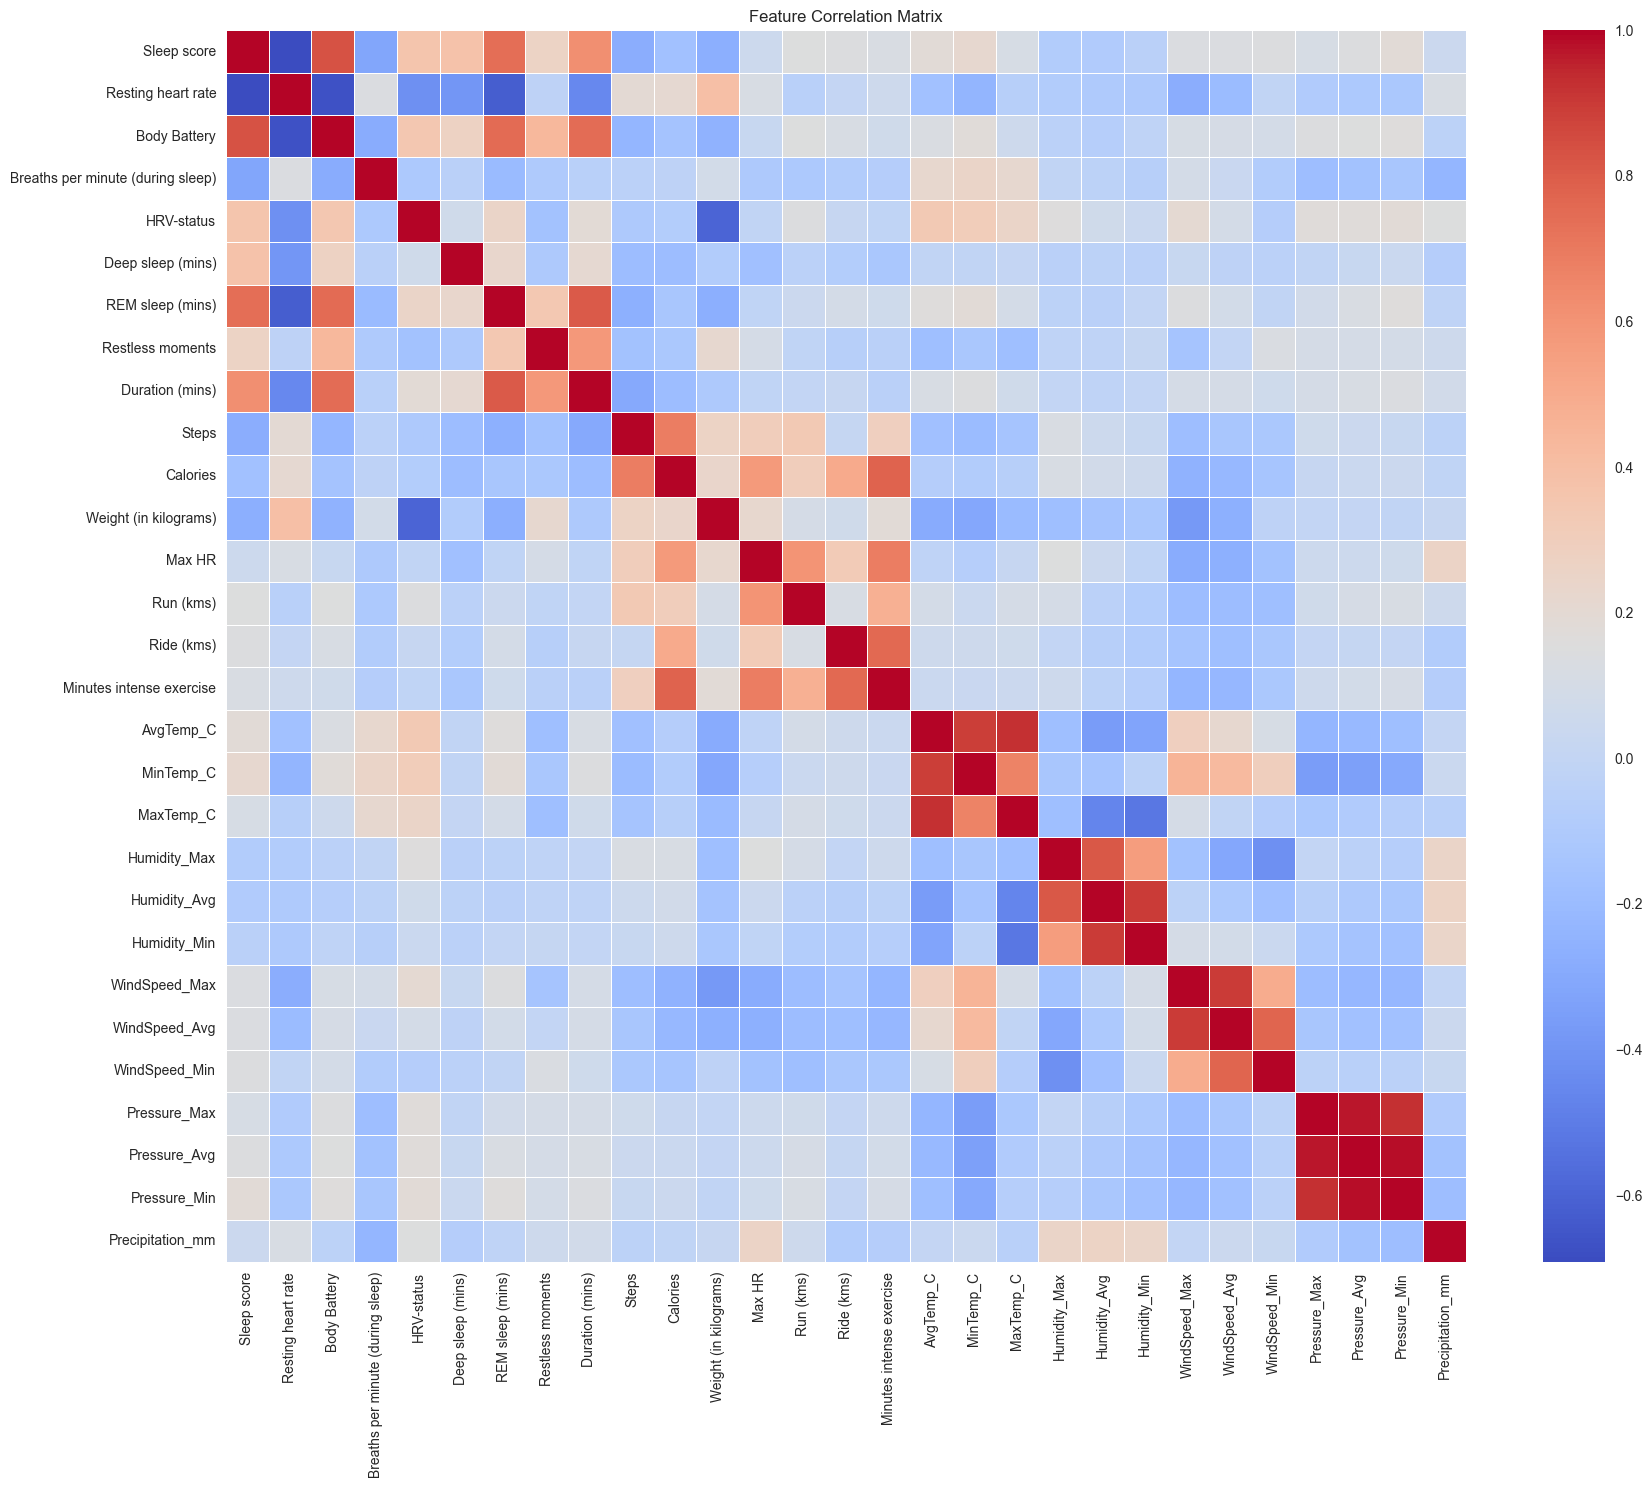

In [13]:
# correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
core_cols = [col for col in numeric_cols if not col.startswith('GMM_outlier')]
# compute correlation matrix for core features
corr_matrix = df[core_cols].corr()

# plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()